# 문제풀이 Overview
* 이번 문제풀이에서는 총 4개의 문제와 1개의 자유주제를 다룹니다.
* 문제를 본격적으로 풀기 전에 아래 코드를 실행해 `pandas` 라이브러리를 임포트하고 데이터를 읽어와주세요.

In [ ]:
import pandas as pd

In [ ]:
blog_ga = pd.read_csv('https://raw.githubusercontent.com/datarian-kr/pandas/main/data/ga_encrypted.csv')

# 데이터 설명
이 데이터는 [데이터리안의 테크 블로그](https://datarian-kr.github.io/) GA(Google Anlaytics) 데이터의 일부입니다. 데이터리안은 GA를 이용해 테크 블로그 안에서 사용자들이 어떤 페이지를 보는지, 어떤 요소를 클릭하는지 등 사용자 로그를 분석합니다.

데이터리안 블로그에서 발생할 수 있는 수많은 액션 중 가장 중요한 액션은 무엇일까요? 바로 **메인 페이지에 있는 인프런 강의로 랜딩되는 링크 클릭**입니다.

<div>
<img src="https://github.com/datarian-kr/pandas/blob/main/img/blog_main.png?raw=true" width="500"/>
</div>

우리가 원하는 이상적인 사용자 시나리오는 이렇습니다.

* Step 1. 블로그로 유입된 사용자가
* Step 2. 블로그 메인 페이지의 링크를 타고 인프런 강의 소개 페이지로 넘어가서
* Step 3. 강의 결제를 한다

우리는 이 퍼널의 전체 데이터를 알지는 못합니다. 3단계에서 어떤 일이 벌어지는지 우리는 전혀 알지 못하죠. 인프런 데이터니까요. 그러나 퍼널의 1, 2단계를 최적화하는 건 우리가 할 수 있는 영역입니다.

오늘은 위 분석 시나리오의 일부로, 블로그 안에서 발생하는 링크 클릭 데이터를 분석하여 **어떤 링크가 가장 많이 클릭되는지** 살펴보도록 하겠습니다.

**컬럼 상세**
* event_date_kst: 이벤트가 일어난 날짜 (KST)
* user_pseudo_id: 암호화 된 사용자 아이디
* event_timestamp_kst: 이벤트가 일어난 시각 (KST)
* user_first_touch_timestamp_kst: 사용자가 처음 사이트를 방문한 시각 (KST)
* event_name: 이벤트 이름
* key: 이벤트 매개변수의 키
* string_value: 이벤트 매개변수의 문자열 값
* int_value: 이벤트 매개변수의 정수 값
* geo_continent: 이벤트가 발생한 대륙
* geo_country: 이벤트가 발생한 국가
* traffic_source_medium: 사용자를 최초로 획득한 매체
* traffic_source: 사용자를 최초로 획득한 네트워크의 이름

**참고**  
위 데이터는 BigQuery로 내보낸 GA4의 속성 데이터입니다. 데이터의 형식 및 스키마에 대한 더 자세한 설명은 `BigQuery Export 스키마` 문서를 참고하세요. 각 이벤트가 수집되는 기준은 `[GA4] 자동으로 수집되는 이벤트` 문서에서 찾아보실 수 있습니다.
* [BigQuery Export 스키마](https://support.google.com/analytics/answer/7029846?hl=ko)
* [[GA4] 자동으로 수집되는 이벤트](https://support.google.com/analytics/answer/9234069)

# 데이터 미리보기

In [ ]:
blog_ga.columns

Index(['event_date_kst', 'user_pseudo_id', 'event_timestamp_kst',
       'user_first_touch_timestamp_kst', 'event_name', 'key', 'string_value',
       'int_value', 'geo_continent', 'geo_country', 'traffic_source_medium',
       'traffic_source'],
      dtype='object')

In [ ]:
# 데이터프레임 미리보기1

# blog_ga.head(5)
# blog_ga.tail(2)
blog_ga.sample(5)

,event_date_kst,user_pseudo_id,event_timestamp_kst,user_first_touch_timestamp_kst,event_name,key,string_value,int_value,geo_continent,geo_country,traffic_source_medium,traffic_source
2099,2021-08-08,0366e3adba5d9a05cc393e7af12d6bee20d511c0,2021-08-08 2:58:11,2021-08-08 2:57:40,user_engagement,session_engaged,1,NaN,Asia,South Korea,(none),(direct)
6433,2021-08-04,973dd139fd9518834c95656556e1d5342ec033d7,2021-08-04 15:41:54,2021-08-04 15:40:36,scroll,ga_session_number,NaN,1.0,Asia,South Korea,organic,google
12292,2021-08-10,6815e666f5e45dbc148219cc7e89b8f61fc9f244,2021-08-10 10:15:41,2021-08-10 10:11:22,click,session_engaged,1,NaN,Asia,South Korea,(none),(direct)
9372,2021-08-03,7c9928b882def21aaee5a8d127c48aa93e651f8d,2021-08-03 23:23:58,2021-08-03 23:23:16,click,outbound,true,NaN,Asia,South Korea,organic,google
12370,2021-08-10,6815e666f5e45dbc148219cc7e89b8f61fc9f244,2021-08-10 10:56:00,2021-08-10 10:11:22,click,link_url,https://www.inflearn.com/course/%EB%B0%B1%EB%A...,NaN,Asia,South Korea,(none),(direct)


In [ ]:
# 데이터프레임 미리보기2

# blog_ga[10:20]   # 슬라이싱
blog_ga[blog_ga['event_name'] == 'click']   # 조건부
# blog_ga.iloc[0, 5]   # 행과 열의 정수 위치를 기반으로 행을 선택
# blog_ga.loc[0, 'event_name'] # 라벨(label)을 기반으로 행을 선택

,event_date_kst,user_pseudo_id,event_timestamp_kst,user_first_touch_timestamp_kst,event_name,key,string_value,int_value,geo_continent,geo_country,traffic_source_medium,traffic_source
389,2021-08-05,f7a02f8d062a235380fe478d63bca56adee4f038,2021-08-05 16:22:29,2021-08-05 16:22:01,click,engagement_time_msec,NaN,6.287000e+03,Asia,South Korea,(none),(direct)
390,2021-08-05,f7a02f8d062a235380fe478d63bca56adee4f038,2021-08-05 16:22:29,2021-08-05 16:22:01,click,page_location,https://datarian-kr.github.io/,NaN,Asia,South Korea,(none),(direct)
391,2021-08-05,f7a02f8d062a235380fe478d63bca56adee4f038,2021-08-05 16:22:29,2021-08-05 16:22:01,click,outbound,true,NaN,Asia,South Korea,(none),(direct)
392,2021-08-05,f7a02f8d062a235380fe478d63bca56adee4f038,2021-08-05 16:22:29,2021-08-05 16:22:01,click,link_url,https://www.inflearn.com/course/%EC%B6%94%EC%B...,NaN,Asia,South Korea,(none),(direct)
393,2021-08-05,f7a02f8d062a235380fe478d63bca56adee4f038,2021-08-05 16:22:29,2021-08-05 16:22:01,click,engaged_session_event,NaN,1.000000e+00,Asia,South Korea,(none),(direct)
...,...,...,...,...,...,...,...,...,...,...,...,...
12415,2021-08-10,6815e666f5e45dbc148219cc7e89b8f61fc9f244,2021-08-10 10:56:45,2021-08-10 10:11:22,click,ga_session_id,NaN,1.628558e+09,Asia,South Korea,(none),(direct)
12416,2021-08-10,6815e666f5e45dbc148219cc7e89b8f61fc9f244,2021-08-10 10:56:45,2021-08-10 10:11:22,click,link_classes,project-body,NaN,Asia,South Korea,(none),(direct)
12417,2021-08-10,6815e666f5e45dbc148219cc7e89b8f61fc9f244,2021-08-10 10:56:45,2021-08-10 10:11:22,click,page_location,https://datarian-kr.github.io/,NaN,Asia,South Korea,(none),(direct)
12418,2021-08-10,6815e666f5e45dbc148219cc7e89b8f61fc9f244,2021-08-10 10:56:45,2021-08-10 10:11:22,click,link_domain,inflearn.com,NaN,Asia,South Korea,(none),(direct)


# Q1. 탐색적 데이터 분석

탐색적 데이터 분석이란, 처음 만나는 데이터와 인사를 하는 시간입니다. 어디에서 왔는지, 어떻게 생겼는지, 어떤 것들을 가지고 있는지 데이터가 지칠 때까지 꼬치꼬치 캐물어보길 바랍니다.

**아래의 간단한 질문들에 답하며 EDA를 시작해볼까요?**
<br>
<br>
🇶 총 몇 개의 데이터가 들어있나요?
<br>
🇦 12,457개
<br>
<br>
🇶 몇 일치의 데이터가 들어있나요?
<br>
🇦 13일
<br>
🇦 2021-07-29 부터 2021-08-10 까지
<br>
<br>
🇶 `event_name`, `key`, `geo_continent` 등 컬럼에는 각각 어떤 데이터들이 들어있나요?
<br>
🇦 event_name:  ['first_visit' 'session_start' 'page_view' 'scroll' 'user_engagement'
 'click']
<br>
🇦 key:  ['page_location' 'session_engaged' 'page_title' 'engaged_session_event'
 'ga_session_id' 'ga_session_number' 'entrances' 'engagement_time_msec'
 'percent_scrolled' 'ignore_referrer' 'page_referrer' 'medium' 'term'
 'source' 'campaign' 'outbound' 'link_url' 'link_domain' 'link_classes']
<br>
🇦 geo_continent:  ['Asia' 'Americas']
<br>
<br>
🇶 일자별로 몇 명의 유저가 방문했나요?
<br>
🇦
<br>
<table>
  <tr>
    <th>날짜</th>
    <th>값</th>
  </tr>
  <tr>
    <td>2021-07-29</td>
    <td>11</td>
  </tr>
  <tr>
    <td>2021-07-30</td>
    <td>12</td>
  </tr>
  <tr>
    <td>2021-07-31</td>
    <td>12</td>
  </tr>
  <tr>
    <td>2021-08-01</td>
    <td>6</td>
  </tr>
  <tr>
    <td>2021-08-02</td>
    <td>18</td>
  </tr>
  <tr>
    <td>2021-08-03</td>
    <td>10</td>
  </tr>
  <tr>
    <td>2021-08-04</td>
    <td>18</td>
  </tr>
  <tr>
    <td>2021-08-05</td>
    <td>13</td>
  </tr>
  <tr>
    <td>2021-08-06</td>
    <td>18</td>
  </tr>
  <tr>
    <td>2021-08-07</td>
    <td>7</td>
  </tr>
  <tr>
    <td>2021-08-08</td>
    <td>11</td>
  </tr>
  <tr>
    <td>2021-08-09</td>
    <td>26</td>
  </tr>
  <tr>
    <td>2021-08-10</td>
    <td>18</td>
  </tr>
</table>

<br>
<br>
🇶 링크 클릭과 관련한 로그는 어떤 조건으로 찾을 수 있나요? (중요!)
<br>
🇦 'event_name' 컬럼에 'click' 키 값이면서,
<br>
🇦'key' 컬럼에 'link_url' 또는 'link_domain', 'link_classes' 키 값을 가지는 로그를 필터링합니다.
<br>
🇦 아래는 링크 클릭과 관련된 로그 분석 내용을 쿼리로 나타낸 것입니다.


```
# click_events_with_link_url = blog_ga[(blog_ga['event_name'] == 'click') & (blog_ga['string_value'] == 'link_url')]

```

In [ ]:
# 데이터프레임 요약 정보
blog_ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   event_date_kst                  12457 non-null  object 
 1   user_pseudo_id                  12457 non-null  object 
 2   event_timestamp_kst             12457 non-null  object 
 3   user_first_touch_timestamp_kst  12457 non-null  object 
 4   event_name                      12457 non-null  object 
 5   key                             12457 non-null  object 
 6   string_value                    7050 non-null   object 
 7   int_value                       5407 non-null   float64
 8   geo_continent                   12457 non-null  object 
 9   geo_country                     12457 non-null  object 
 10  traffic_source_medium           12457 non-null  object 
 11  traffic_source                  12457 non-null  object 
dtypes: float64(1), object(11)
memory

In [ ]:
# 기간 확인하기
dates = blog_ga['event_date_kst'].unique()
print(len(dates))

dates.sort()
print(dates)


# 날짜 데이터 타입변경 & 정렬
# dates = blog_ga['event_date_kst'].unique()     # 중복된 날짜 제거
# dates = pd.to_datetime(dates)                # 날짜 타입으로 변경
# sorted_dates = dates.sort_values()           # 시간 순서대로 정렬

# print(len(sorted_dates))
# print(sorted_dates)

13
['2021-07-29' '2021-07-30' '2021-07-31' '2021-08-01' '2021-08-02'
 '2021-08-03' '2021-08-04' '2021-08-05' '2021-08-06' '2021-08-07'
 '2021-08-08' '2021-08-09' '2021-08-10']


In [ ]:
# 변수(values) 확인하기  ['event_name', 'key', 'geo_continent']
print('event_name: ', blog_ga['event_name'].unique())
print('key: ', blog_ga['key'].unique())
print('geo_continent: ', blog_ga['geo_continent'].unique())

event_name:  ['first_visit' 'session_start' 'page_view' 'scroll' 'user_engagement'
 'click']
key:  ['page_location' 'session_engaged' 'page_title' 'engaged_session_event'
 'ga_session_id' 'ga_session_number' 'entrances' 'engagement_time_msec'
 'percent_scrolled' 'ignore_referrer' 'page_referrer' 'medium' 'term'
 'source' 'campaign' 'outbound' 'link_url' 'link_domain' 'link_classes']
geo_continent:  ['Asia' 'Americas']


In [ ]:
# 일자별 방문자수 확인하기1
blog_ga['event_date_kst'] = pd.to_datetime(blog_ga['event_date_kst'])   # event_date_kst 열을 날짜로 변환
blog_ga['event_date_kst'].head(2)

0   2021-08-05
1   2021-08-05
Name: event_date_kst, dtype: datetime64[ns]

In [ ]:
# 일자별 방문자수 확인하기2
daily_user_count = blog_ga.groupby('event_date_kst')['user_pseudo_id'].nunique()   # 각 날짜에 방문한 유저 수를 계산
daily_user_count

event_date_kst
2021-07-29    11
2021-07-30    12
2021-07-31    12
2021-08-01     6
2021-08-02    18
2021-08-03    10
2021-08-04    18
2021-08-05    13
2021-08-06    18
2021-08-07     7
2021-08-08    11
2021-08-09    26
2021-08-10    18
Name: user_pseudo_id, dtype: int64

In [ ]:
# event와 key의 관계 확인
event_key_pair = blog_ga[['event_name', 'key']].drop_duplicates()   # 중복된 행을 제거
event_key_pair

,event_name,key
0,first_visit,page_location
1,first_visit,session_engaged
2,first_visit,page_title
3,first_visit,engaged_session_event
4,first_visit,ga_session_id
...,...,...
447,click,term
495,scroll,medium
500,scroll,campaign
501,scroll,term


In [ ]:
# 각 event에 들어가는 파라미터(key)는 이벤트마다 다름
print('first_visit: ', list(event_key_pair.loc[event_key_pair['event_name'] == 'first_visit', 'key']))
print('scroll: ', list(event_key_pair.loc[event_key_pair['event_name'] == 'scroll', 'key']))
print('click: ', list(event_key_pair.loc[event_key_pair['event_name'] == 'click', 'key']))

first_visit:  ['page_location', 'session_engaged', 'page_title', 'engaged_session_event', 'ga_session_id', 'ga_session_number', 'page_referrer']
scroll:  ['session_engaged', 'page_title', 'engagement_time_msec', 'ga_session_id', 'engaged_session_event', 'percent_scrolled', 'page_location', 'ga_session_number', 'page_referrer', 'ignore_referrer', 'medium', 'campaign', 'term', 'source']
click:  ['engagement_time_msec', 'page_location', 'outbound', 'link_url', 'engaged_session_event', 'ignore_referrer', 'link_domain', 'link_classes', 'page_title', 'ga_session_id', 'page_referrer', 'ga_session_number', 'session_engaged', 'source', 'medium', 'campaign', 'term']


### **이벤트 상세**

상단에 `[GA4] 자동으로 수집되는 이벤트` 문서 참고

* first_visit: 사용자가 웹사이트에 처음 방문
* session_start: 사용자가 앱 또는 웹사이트에 참여할 때
* page_view: 페이지가 로드될 때
* scroll: 사용자가 각 페이지에서 처음으로 하단에 도달할 때
* user_engagement: 1초 이상 웹페이지에 머물렀을 때
* click: 사용자가 현재 도메인에서 나가는 링크를 클릭할 때 *(링크 클릭과 관련된 로그)*

In [ ]:
# 링크 클릭과 관련한 로그
clicks = blog_ga[blog_ga['event_name'] == 'click']
clicks.sample(5)

,event_date_kst,user_pseudo_id,event_timestamp_kst,user_first_touch_timestamp_kst,event_name,key,string_value,int_value,geo_continent,geo_country,traffic_source_medium,traffic_source
5389,2021-08-04,a3c5e910cdeeb9c66c02b770a9e2b2bdc6faaf84,2021-08-04 17:17:26,2021-08-04 17:13:53,click,page_referrer,https://datarian-kr.github.io/blog/,NaN,Asia,South Korea,(none),(direct)
11211,2021-07-29,a3c851063bc2fd8e956d1c9e1065d1f9fe4118c1,2021-07-29 13:32:54,2021-07-29 13:32:38,click,ga_session_number,NaN,1.000000e+00,Asia,South Korea,(none),(direct)
9455,2021-08-03,fb7ddf3c9e94a556e44d91fb113cf82a3d6894aa,2021-08-03 16:33:00,2021-08-03 16:32:23,click,page_referrer,https://datarian-kr.github.io/,NaN,Asia,South Korea,referral,brunch.co.kr
10822,2021-08-09,3f7a992fd22cbc076f6fba284b9dec8c94164452,2021-08-09 20:38:47,2021-08-09 20:38:38,click,link_domain,inflearn.com,NaN,Asia,South Korea,(none),(direct)
2162,2021-08-08,0366e3adba5d9a05cc393e7af12d6bee20d511c0,2021-08-08 2:58:32,2021-08-08 2:57:40,click,ga_session_id,NaN,1.628359e+09,Asia,South Korea,(none),(direct)


In [ ]:
# event_name = 'click'에 저장되는 파라미터(key값)의 종류
clicks['key'].unique()

array(['engagement_time_msec', 'page_location', 'outbound', 'link_url',
       'engaged_session_event', 'ignore_referrer', 'link_domain',
       'link_classes', 'page_title', 'ga_session_id', 'page_referrer',
       'ga_session_number', 'session_engaged', 'source', 'medium',
       'campaign', 'term'], dtype=object)

In [ ]:
# 이 중에 url 링크 정보가 들어가는 파라미터는 'link_url'이다
clicks.loc[clicks['key'] == 'link_url', 'string_value']

392      https://www.inflearn.com/course/%EC%B6%94%EC%B...
437      https://www.donga.com/news/Economy/article/all...
476      https://www.inflearn.com/course/%EB%B0%B1%EB%A...
659                                   https://lbm.oopy.io/
983      https://www.inflearn.com/course/%EB%B0%B1%EB%A...
                               ...                        
12370    https://www.inflearn.com/course/%EB%B0%B1%EB%A...
12385    https://www.inflearn.com/course/%EB%8D%B0%EC%9...
12392    https://www.inflearn.com/course/%EB%8D%B0%EC%9...
12407    https://www.inflearn.com/course/sql-%EC%A4%91%...
12411    https://www.inflearn.com/course/%EB%8D%B0%EC%9...
Name: string_value, Length: 111, dtype: object

# Q2. 링크 클릭
데이터리안 블로그에서 외부로 연결되는 링크들이 얼마나 클릭되고 있는지 알고 싶습니다. 각 링크 별로 몇 번 클릭 되었는지를 계산해주세요. 아래 단계에 따라 진행해주세요.

* Step 1. 클릭된 링크 정보가 있는 행만 필터링하여 `link_data` 변수에 저장
* Step 2. `value_counts()` 또는 `groupby()`를 사용하여 각 링크 별로 몇 번 클릭되었는지 집계

In [ ]:
# 클릭&링크 변수 찾아내기
click = blog_ga['event_name'] == 'click'
link_url = blog_ga['key'] == 'link_url'

blog_ga[blog_ga['event_name'] == 'click']   # []는 'True' 값만 출력
blog_ga[blog_ga['key'] == 'link_url']

,event_date_kst,user_pseudo_id,event_timestamp_kst,user_first_touch_timestamp_kst,event_name,key,string_value,int_value,geo_continent,geo_country,traffic_source_medium,traffic_source
392,2021-08-05,f7a02f8d062a235380fe478d63bca56adee4f038,2021-08-05 16:22:29,2021-08-05 16:22:01,click,link_url,https://www.inflearn.com/course/%EC%B6%94%EC%B...,NaN,Asia,South Korea,(none),(direct)
437,2021-08-05,f575be8ae1780761707a7f1c09b671ad9dee5095,2021-08-05 16:17:04,2021-08-05 16:16:41,click,link_url,https://www.donga.com/news/Economy/article/all...,NaN,Asia,South Korea,careerly,publy
476,2021-08-05,70e3806d942c9b9152ffa5a5d812251770a5b2eb,2021-08-05 9:42:52,2021-08-05 9:42:21,click,link_url,https://www.inflearn.com/course/%EB%B0%B1%EB%A...,NaN,Asia,South Korea,organic,google
659,2021-08-05,2dc21c4805dbcc74729acc8073d681e6aa6d3662,2021-08-05 0:29:01,2021-08-05 0:28:04,click,link_url,https://lbm.oopy.io/,NaN,Asia,South Korea,organic,google
983,2021-07-31,8dfde26f7028c9d7903e192a6c647638feaf2e5a,2021-07-31 2:29:37,2021-07-31 2:27:19,click,link_url,https://www.inflearn.com/course/%EB%B0%B1%EB%A...,NaN,Asia,South Korea,organic,google
...,...,...,...,...,...,...,...,...,...,...,...,...
12370,2021-08-10,6815e666f5e45dbc148219cc7e89b8f61fc9f244,2021-08-10 10:56:00,2021-08-10 10:11:22,click,link_url,https://www.inflearn.com/course/%EB%B0%B1%EB%A...,NaN,Asia,South Korea,(none),(direct)
12385,2021-08-10,6815e666f5e45dbc148219cc7e89b8f61fc9f244,2021-08-10 10:56:06,2021-08-10 10:11:22,click,link_url,https://www.inflearn.com/course/%EB%8D%B0%EC%9...,NaN,Asia,South Korea,(none),(direct)
12392,2021-08-10,6815e666f5e45dbc148219cc7e89b8f61fc9f244,2021-08-10 10:56:06,2021-08-10 10:11:22,click,link_url,https://www.inflearn.com/course/%EB%8D%B0%EC%9...,NaN,Asia,South Korea,(none),(direct)
12407,2021-08-10,6815e666f5e45dbc148219cc7e89b8f61fc9f244,2021-08-10 10:56:40,2021-08-10 10:11:22,click,link_url,https://www.inflearn.com/course/sql-%EC%A4%91%...,NaN,Asia,South Korea,(none),(direct)


In [ ]:
 # Step 1,2

 ## value_counts() 사용 ((간단))
link_data = blog_ga[click & link_url].copy()   # click & link_url 두가지 조건 동시에 그리고 copy() 는 link_data 에 저장 x 복사 o
link_data['string_value'].value_counts()

https://github.com/springkind                                                                           20
https://www.inflearn.com/course/%EB%B0%B1%EB%AC%B8%EC%9D%B4%EB%B6%88%EC%97%AC%EC%9D%BC%ED%83%80-%EB%    15
https://github.com/ysunmi0427                                                                           11
https://www.inflearn.com/course/%EC%B6%94%EC%B2%9C-%EC%8B%9C%EC%8A%A4%ED%85%9C-%EC%9E%85%EB%AC%B8%ED     6
https://lbm.oopy.io/                                                                                     6
https://github.com/canary4651                                                                            5
https://github.com/eyhadmik                                                                              5
https://github.com/datarian-kr                                                                           4
https://www.inflearn.com/course/sql-%EC%A4%91%EA%B8%89-%EB%AC%B8%EC%A0%9C%ED%92%80%EC%9D%B4?inst=992     4
https://github.com/jaem1n            

In [ ]:
## groupby() 사용
link_data = blog_ga[click & link_url].copy()
link_data.groupby('string_value').size().reset_index(name='count').sort_values(by='count', ascending=False)

,string_value,count
10,https://github.com/springkind,20
20,https://www.inflearn.com/course/%EB%B0%B1%EB%A...,15
11,https://github.com/ysunmi0427,11
12,https://lbm.oopy.io/,6
21,https://www.inflearn.com/course/%EC%B6%94%EC%B...,6
5,https://github.com/canary4651,5
7,https://github.com/eyhadmik,5
22,https://www.inflearn.com/course/sql-%EC%A4%91%...,4
6,https://github.com/datarian-kr,4
9,https://github.com/jaem1n,4


# Q3-1. 인프런 강의 링크 정제 (문자열 자르기)
여러 링크들 중 인프런 강의로 연결되는 링크만 보고 싶습니다. 그리고 이왕이면 읽기 쉬운 형태로 정제하고 싶습니다.

아래 단계에 따라 텍스트 데이터를 정제해주세요. 더미로 주어진 코드를 수정하며 진행하시면 됩니다.

* Step 1. `link_data` 데이터 프레임 안에 있는 데이터 중 inflearn 주소가 들어있는 행만 필터링하여 `inflearn` 이라는 변수에 저장
* Step 2. `inflearn` 데이터 프레임의 `string_value` 컬럼에 들어있는 url을 '/'를 기준으로 분해하여 `str_splited` 컬럼에 저장

**Output 예시**

|      | str_splited |
|:-----|:------------|
|  392 | ['https:', '', 'www.inflearn.com', 'course', '%EC%B6%94%EC%B2%9C-%EC%8B%9C%EC%8A%A4%ED%85%9C-%EC%9E%85%EB%AC%B8%ED'] |
|  476 | ['https:', '', 'www.inflearn.com', 'course', '%EB%B0%B1%EB%AC%B8%EC%9D%B4%EB%B6%88%EC%97%AC%EC%9D%BC%ED%83%80-%EB%'] |
|  983 | ['https:', '', 'www.inflearn.com', 'course', '%EB%B0%B1%EB%AC%B8%EC%9D%B4%EB%B6%88%EC%97%AC%EC%9D%BC%ED%83%80-%EB%'] |
| 1011 | ['https:', '', 'www.inflearn.com', 'course', '%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EC%A4%91%EA%B8%89-sq'] |
| 2553 | ['https:', '', 'www.inflearn.com', 'roadmaps', '334'] |

In [ ]:
# Step 1,2
inflearn = link_data.loc[link_data['string_value'].str.contains('inflearn.com')].copy() # Step 1
inflearn['str_splited'] = inflearn['string_value'].str.split('/') # Step 2
inflearn['str_splited'].sample(2)

12385    [https:, , www.inflearn.com, course, %EB%8D%B0...
1011     [https:, , www.inflearn.com, course, %EB%8D%B0...
Name: str_splited, dtype: object

# Q3-2. 인프런 강의 링크 정제 (요소 선택하기)

아래 단계에 따라 텍스트 데이터를 정제해주세요.

* Step 1. `inflearn` 데이터 프레임의 `str_splited` 컬럼에 들어간 데이터 중 각 리스트의 3번째, 4번째 인덱스 값을 추출하여 각각 `url_category`, `url_detail` 컬럼에 저장하세요. 더미로 주어진 코드를 수정하시면 됩니다.

**Output 예시**

|      | url_category   | url_detail |
|-----|:---------------|:------------------|
|  392 | course         | %EC%B6%94%EC%B2%9C-%EC%8B%9C%EC%8A%A4%ED%85%9C-%EC%9E%85%EB%AC%B8%ED |
|  476 | course         | %EB%B0%B1%EB%AC%B8%EC%9D%B4%EB%B6%88%EC%97%AC%EC%9D%BC%ED%83%80-%EB% |
|  983 | course         | %EB%B0%B1%EB%AC%B8%EC%9D%B4%EB%B6%88%EC%97%AC%EC%9D%BC%ED%83%80-%EB% |
| 1011 | course         | %EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EC%A4%91%EA%B8%89-sq |
| 2553 | roadmaps       | 334                                                                  |

In [ ]:
# Step 1
inflearn['url_category'] = inflearn['str_splited'].str.get(3)   # get(3) 인덱스 레벨이 3에 해당하는 (즉 4열)
inflearn['url_detail'] = inflearn['str_splited'].str.get(4)

print(inflearn['url_category'].sample(5))
print(inflearn['url_detail'].sample(5))

12411    course
8885     course
983      course
12407    course
3014     course
Name: url_category, dtype: object
8885     sql-%EC%A4%91%EA%B8%89-%EB%AC%B8%EC%A0%9C%ED%9...
12325    %EB%B0%B1%EB%AC%B8%EC%9D%B4%EB%B6%88%EC%97%AC%...
10819    %EB%B0%B1%EB%AC%B8%EC%9D%B4%EB%B6%88%EC%97%AC%...
6863     %EB%B0%B1%EB%AC%B8%EC%9D%B4%EB%B6%88%EC%97%AC%...
8091     %EB%B0%B1%EB%AC%B8%EC%9D%B4%EB%B6%88%EC%97%AC%...
Name: url_detail, dtype: object


# Q3-3. 인프런 강의 링크 정제 (URL 디코드)

데이터리안 강의 url의 일부는 한글입니다.

예를 들어, [백문이불여일타] 데이터 분석을 위한 기초 SQL 강의의 url은 [`https://www.inflearn.com/course/백문이불여일타-데이터-분석-기초-sql`](https://www.inflearn.com/course/백문이불여일타-데이터-분석-기초-sql) 입니다. 이를 url 표준 표현 방식에 따라 인코드(encode)을 하다보니 [`https://www.inflearn.com/course/%EB%B0%B1%EB%AC%B8%EC%9D%B4%EB%B6%88%EC%97%AC%EC%9D%BC%ED%83%80-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EA%B8%B0%EC%B4%88-sql`](https://www.inflearn.com/course/%EB%B0%B1%EB%AC%B8%EC%9D%B4%EB%B6%88%EC%97%AC%EC%9D%BC%ED%83%80-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EA%B8%B0%EC%B4%88-sql) 와 같이 긴 url 이 됐습니다.

GA 역시 클릭 이벤트 발생 시 인코딩 된 url을 저장합니다. 그리고 저장하는 과정에서 약간의 오류도 있는 것 같습니다. 우리는 `url_detail` 컬럼에 넣어놓은 값들을 한글로 디코드(decode)해서 클릭된 링크가 어떤 강의 페이지에 해당하는 링크인지 한 눈에 볼 수 있도록 만들겁니다.

`url_detail` 컬럼의 데이터를 아래 단계에 따라 한글로 디코드하고 이를 `url_detail_decode` 컬럼에 저장하세요.

**Output 예시**

GA-Google BigQuery 연동 문제로 결과가 깔끔하지는 않지만 디코드 전보다는 훨씬 알아보기 쉬운 상태가 되었습니다 😁


|      | url_detail_decode   |
|-----:|:--------------------|
|  392 | 추천-시스템-입문�   |
|  476 | 백문이불여일타-�%   |
|  983 | 백문이불여일타-�%   |
| 1011 | 데이터-분석-중급-sq |
| 2553 | 334                 |

### 질문 1
🇶 블로그 사용자들이 가장 많이 클릭한 인프런 강의 링크는 무엇인가요? 데이터 기간 동안 몇 회 클릭했나요?
<br>
🇦 '백문이불여일타-'라는 단어가 url에 들어간 'https://www.inflearn.com/course/백문이불여일타-데이터-분석-기초-sql' 강의를 데이터 기간 동안 15회로 가장 많이 클릭했습니다.

### 질문 2
🇶 블로그 사용자들은 강의 로드맵 링크를 클릭하고 있나요? 데이터 기간 동안 몇 회 클릭했나요?
<br>
🇦인프런 url은 강의의 경우 inflearn.com/course 로 시작하고, 로드맵의 경우 inflearn.com/roadmaps 로 시작합니다. 데이터 기간 동안 로드맵 링크는 3회 클릭되었고 클릭된 로드맵 링크는 https://www.inflearn.com/roadmaps/334 입니다.

**한글 decode 예시**

```python
import urllib

url = '%EB%B0%B1%EB%AC%B8%EC%9D%B4%EB%B6%88%EC%97%AC%EC%9D%BC%ED%83%80-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EA%B8%B0%EC%B4%88-sql'
url_decoded = urllib.parse.unquote(url)
print(url_decoded)
```

In [ ]:
# url 디코딩
import urllib

inflearn['url_detail_decode'] = inflearn['url_detail'].apply(lambda x: urllib.parse.unquote(x))   # lambda x:는 "url_detail" 열의 각 행에 대해 URL 디코딩을 수행
inflearn['url_detail_decode'].sample(5)

8091               백문이불여일타-�%
10819              백문이불여일타-�%
8739     sql-중급-문제풀이?inst=992
7604                      334
7501     sql-중급-문제풀이?inst=992
Name: url_detail_decode, dtype: object

# Q4. 인프런 강의 링크 클릭

데이터리안 블로그 사용자들이 가장 많이 클릭한 인프런 강의는 무엇인가요? 데이터 기간 동안 몇 회 클릭했나요?

**참고**
* 데이터리안 전체 강의 및 로드맵: https://www.inflearn.com/users/@datarian

In [ ]:
# 인프런 카테고리 & 디코드 확인
inflearn.groupby(['url_category', 'url_detail_decode']).size().sort_values(ascending=False)

url_category  url_detail_decode   
course        백문이불여일타-�%              15
              추천-시스템-입문�               6
              sql-중급-문제풀이?inst=992     4
              데이터-분석-중급-sq             3
roadmaps      334                      3
course        데이터-분석-sql-실�%8          2
              데이터-분석-고급-sq             1
dtype: int64

# Q5. 이벤트 발생 빈도와 링크클릭 세부정보

**시각화**
<br>
- 분석1: 이벤트 별 발생 빈도 분석
<br> > 각 이벤트의 발생 빈도를 확인하여 주요 사용자 상호 작용을 파악합니다.

- 분석2-1: 링크 클릭 이벤트 발생 시간 분석
<br>
- 분석2-2: 링크 클릭 이벤트 지리적 분석
<br>
- 분석2-3: 링크 클릭 이벤트 트래픽 소스 분석
<br>
- 분석2-4: 링크 클릭 이벤트 사용자 행동 패턴 분석

In [ ]:
# 분석1: 이벤트 별 발생 빈도 분석

# 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# 이벤트 별 발생 빈도 분석
event_counts = blog_ga['event_name'].value_counts()
event_counts

page_view          3907
user_engagement    3069
scroll             2056
click              1333
session_start      1180
first_visit         912
Name: event_name, dtype: int64

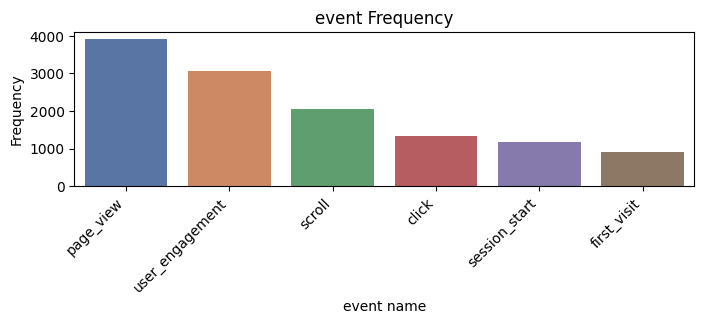

In [ ]:
# 시각화: 이벤트 별 발생 빈도
plt.figure(figsize=(8, 2))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='deep')   #palette: {'viridis', 'deep', 'muted', 'dark', 'pastel', 'colorblind'}
plt.title('event Frequency')
plt.xlabel('event name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')   # ha: 텍스트 정렬
plt.show()

hour
0      552
1      351
2      324
3      203
4       32
7       70
8       63
9      421
10     439
11     302
12     307
13     733
14     408
15     828
16     906
17    2711
18     488
19     610
20     611
21     718
22     320
23    1060
dtype: int64


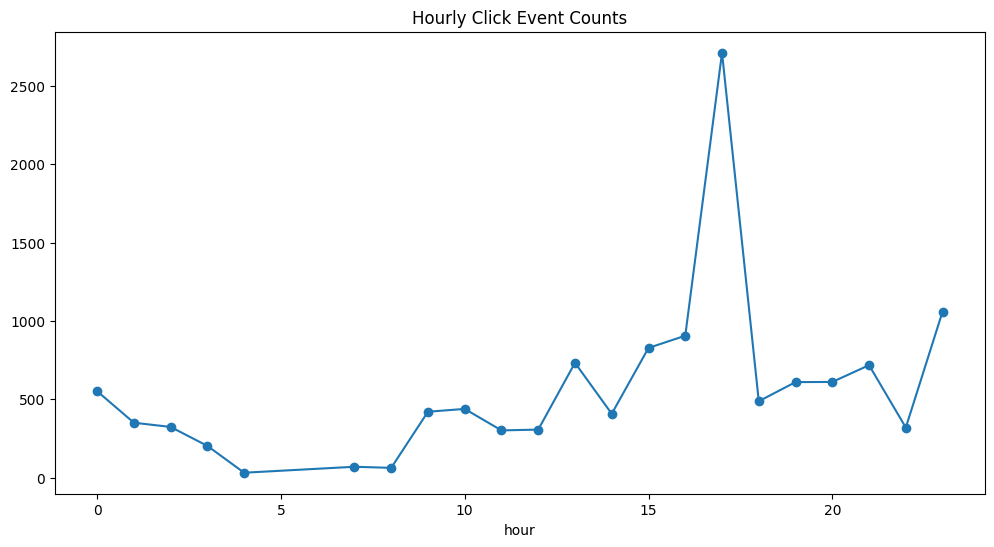

In [ ]:
# 분석2-1: 링크 클릭 이벤트 발생 시간 분석

blog_ga['event_timestamp_kst'] = pd.to_datetime(blog_ga['event_timestamp_kst'])
blog_ga['hour'] = blog_ga['event_timestamp_kst'].dt.hour

click_hourly_counts = blog_ga.groupby('hour').size()
print(click_hourly_counts)
click_hourly_counts.plot(kind='line', marker='o', figsize=(12, 6), title='Hourly Click Event Counts')
plt.show()

geo_country
South Korea      12295
United States      112
Singapore           50
dtype: int64


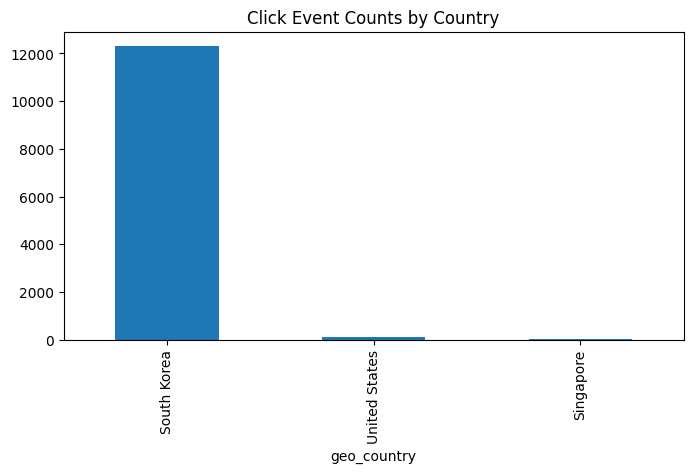

In [ ]:
# 링크 클릭 이벤트 국가별 빈도 분석
click_country_counts = blog_ga.groupby('geo_country').size().sort_values(ascending=False)
print(click_country_counts)

click_country_counts.plot(kind='bar', figsize=(8, 4), title='Click Event Counts by Country')
plt.show()

(none)      6049
organic     5041
referral     934
careerly     433
Name: traffic_source_medium, dtype: int64


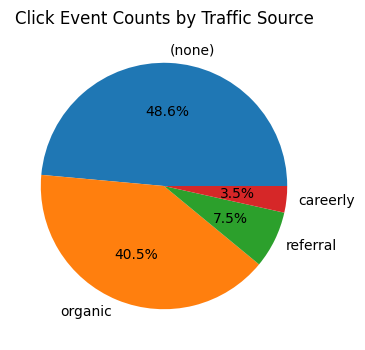

In [ ]:
# 링크 클릭 이벤트 트래픽 소스별 빈도 분석 (파이 차트)
click_source_counts = blog_ga['traffic_source_medium'].value_counts().sort_values(ascending=False)
print(click_source_counts)

click_source_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 4), title='Click Event Counts by Traffic Source')
plt.ylabel('')
plt.show()

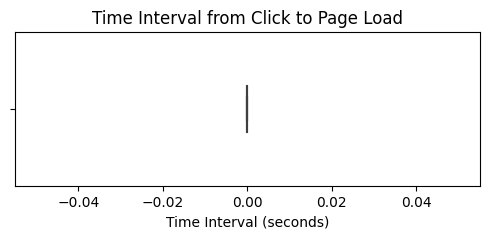

In [ ]:
# 링크 클릭 이벤트와 페이지 로드 이벤트 간의 시간 간격 분석 (박스플롯)
time_to_page_load = (blog_ga['event_timestamp_kst'] - blog_ga['event_timestamp_kst']).dt.seconds
plt.figure(figsize=(6, 2))
sns.boxplot(x=time_to_page_load, width=0.3)
plt.title('Time Interval from Click to Page Load')
plt.xlabel('Time Interval (seconds)')
plt.show()

## 링크 클릭 이벤트와 페이지 로드 이벤트 간의 시간 간격이 0인 경우, 사용자가 링크를 클릭하자마자 해당 페이지로 즉시 이동했음을 의미할 수 있다.
## 반대로 로딩 시간이 크게 나타난다면 에러이슈가 있거나 최소화하는 것이 목표가 될 수 있다.

---
데이터리안에서 제공하는 데이터셋과 문제풀이를 활용하였습니다.
<br>
`#데이터리안` `#판다스공부` `#TIL`